# Maestría en Analítica de Datos
## Proyecto Final Machine Learning 2025-10

### ETL y EDA

In [1]:
# Importar librerías necesarias
from datasets import load_dataset
import pandas as pd

# Cargar el dataset desde Huggin Face
dataset = load_dataset("akshatmehta98/amazon_reviews")

# Mostrando estructura del dataset
dataset

/opt/miniconda3/envs/ml_venv/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


DatasetDict({
    train: Dataset({
        features: ['HelpfulnessNumerator', 'HelpfulnessDenominator', 'Summary', 'text', 'labels', 'sentiment_code', 'input_ids', 'attention_mask'],
        num_rows: 303316
    })
    test: Dataset({
        features: ['HelpfulnessNumerator', 'HelpfulnessDenominator', 'Summary', 'text', 'labels', 'sentiment_code', 'input_ids', 'attention_mask'],
        num_rows: 116661
    })
})

In [2]:
# Convertimos a DataFrame para visualizar mejor
df_train = dataset['train'].to_pandas()
df_test = dataset['test'].to_pandas()  

# Veamos las primeras filas del train
df_train.head(10)

,HelpfulnessNumerator,HelpfulnessDenominator,Summary,text,labels,sentiment_code,input_ids,attention_mask
0,0,0,Great find!,these candies are very hard to find in the sin...,positive,2,[ 0 6097 831 34204 621 4552 7...,[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1...
1,0,0,very tasty - and healthy,im on the healthy nutrition and fitness kick t...,positive,2,[ 0 566 98 70 87349 150017 ...,[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1...
2,0,0,I liked the old man design better :),i dont normally add content to amazon because ...,positive,2,[ 0 17 13319 3638 538 15190 10...,[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1...
3,0,0,Good gluten free cookie!,good tasting cookie will satisfy your sweet to...,positive,2,[ 0 4127 3251 1916 9332 1221 40407 ...,[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1...
4,88,95,Organic but BPA in the lid!,our baby really loves to eat these and they co...,negative,0,[ 0 2446 15546 6183 5161 7 ...,[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1...
5,0,0,a must for gin and tonic,i once tried q tonic for my gin and tonic now ...,positive,2,[ 0 17 24145 37842 8096 47 6...,[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1...
6,1,2,Delicious!,glad i ordered these they are really yummy i g...,positive,2,[ 0 9525 17 12989 297 6097 1...,[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1...
7,0,0,Great tasting tea at best price,my family is big on tea drinking and cant sett...,positive,2,[ 0 759 14449 83 6957 98 26...,[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1...
8,6,9,Tasted bad. Tossed most in the trash,i lived in the islands for 5 years and i know ...,negative,0,[ 0 17 158930 23 70 90695 ...,[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1...
9,0,0,Awesome service and great products,we sent this product as a gift to my husbands ...,positive,2,[ 0 642 9325 903 12996 237 ...,[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1...


In [3]:
#Revisión general del train
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303316 entries, 0 to 303315
Data columns (total 8 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   HelpfulnessNumerator    303316 non-null  int64 
 1   HelpfulnessDenominator  303316 non-null  int64 
 2   Summary                 303316 non-null  object
 3   text                    303316 non-null  object
 4   labels                  303316 non-null  object
 5   sentiment_code          303316 non-null  int64 
 6   input_ids               303316 non-null  object
 7   attention_mask          303316 non-null  object
dtypes: int64(3), object(5)
memory usage: 18.5+ MB


In [4]:
df_train.describe()

,HelpfulnessNumerator,HelpfulnessDenominator,sentiment_code
count,303316.000000,303316.000000,303316.000000
mean,1.844644,2.815661,0.929773
std,6.636582,7.804405,0.833000
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,1.000000,1.000000
75%,2.000000,3.000000,2.000000
max,844.000000,923.000000,2.000000


In [ ]:
# Distribución de la variable Objetivo en el train
df_train["labels"].value_counts(normalize=True)

negative    0.384523
positive    0.314296
neutral     0.301181
Name: labels, dtype: float64

In [ ]:
# Calculemos la longitud de las reseñas en PALABRAS
df_train["length_words"] = df_train["text"].apply(lambda x: len(str(x).split()))

# Calculemos la longitud de las reseñas en CARACTERES
df_train["length_chars"] = df_train["text"].apply(lambda x: len(str(x)))

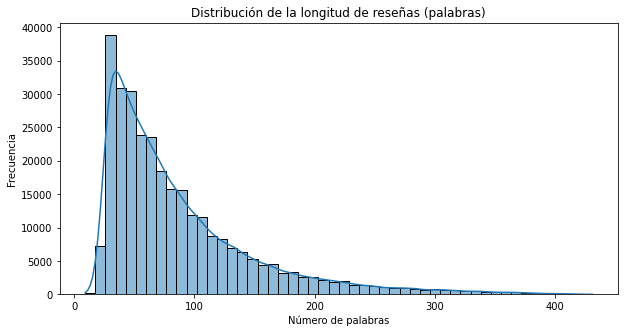

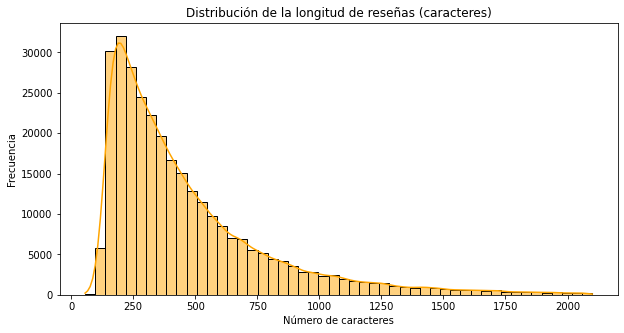

In [8]:
# Librerías necesarias
import matplotlib.pyplot as plt
import seaborn as sns

# Histograma de longitud en palabras
plt.figure(figsize=(10,5))
sns.histplot(df_train['length_words'], bins=50, kde=True)
plt.title('Distribución de la longitud de reseñas (palabras)')
plt.xlabel('Número de palabras')
plt.ylabel('Frecuencia')
plt.show()

# Histograma de longitud en caracteres
plt.figure(figsize=(10,5))
sns.histplot(df_train['length_chars'], bins=50, kde=True, color='orange')
plt.title('Distribución de la longitud de reseñas (caracteres)')
plt.xlabel('Número de caracteres')
plt.ylabel('Frecuencia')
plt.show()

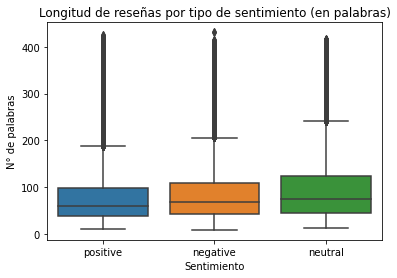

In [9]:
# Relacionamos longitud con el sentimiento
sns.boxplot(data=df_train, x='labels', y='length_words')
plt.title('Longitud de reseñas por tipo de sentimiento (en palabras)')
plt.xlabel('Sentimiento')
plt.ylabel('N° de palabras')
plt.show()

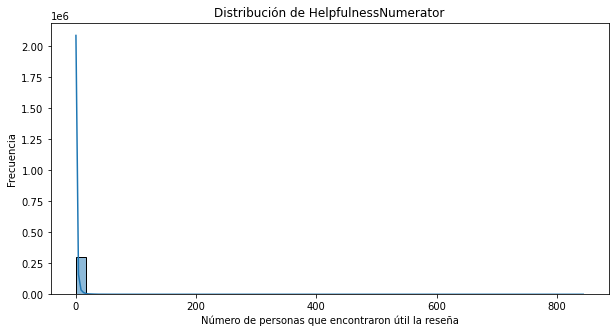

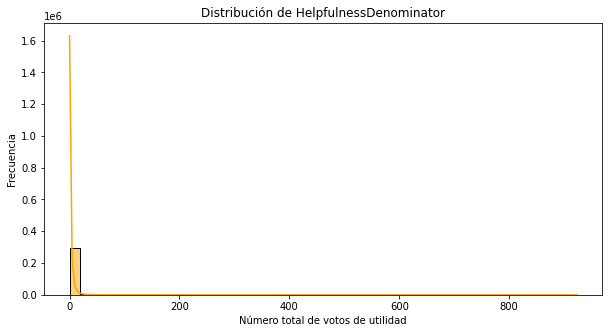

In [10]:
# Distribución de las variables HelpfulnessNumerator y HelpfulnessDenominator

# HelpfulnessNumerator
plt.figure(figsize=(10,5))
sns.histplot(df_train['HelpfulnessNumerator'], bins=50, kde=True)
plt.title('Distribución de HelpfulnessNumerator')
plt.xlabel('Número de personas que encontraron útil la reseña')
plt.ylabel('Frecuencia')
plt.show()

# HelpfulnessDenominator
plt.figure(figsize=(10,5))
sns.histplot(df_train['HelpfulnessDenominator'], bins=50, kde=True, color='orange')
plt.title('Distribución de HelpfulnessDenominator')
plt.xlabel('Número total de votos de utilidad')
plt.ylabel('Frecuencia')
plt.show()

In [11]:
# Agregamos una columna de ratio de utilidad
# Esto normaliza un poco el análisis
df_train['helpfulness_ratio'] = df_train['HelpfulnessNumerator'] / (df_train['HelpfulnessDenominator'] + 1)

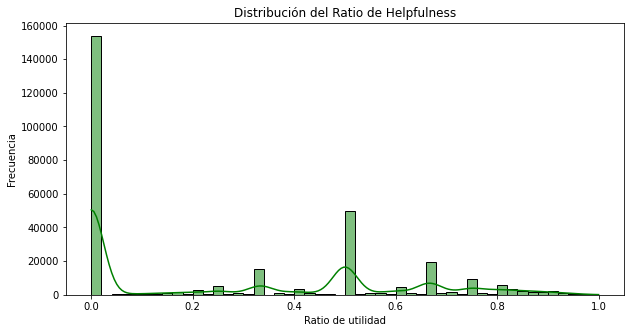

In [14]:
#Visualizamos la distribución del ratio de utilidad
plt.figure(figsize=(10,5))
sns.histplot(df_train['helpfulness_ratio'], bins=50, kde=True, color='green')
plt.title('Distribución del Ratio de Helpfulness')
plt.xlabel('Ratio de utilidad')
plt.ylabel('Frecuencia')
plt.show()

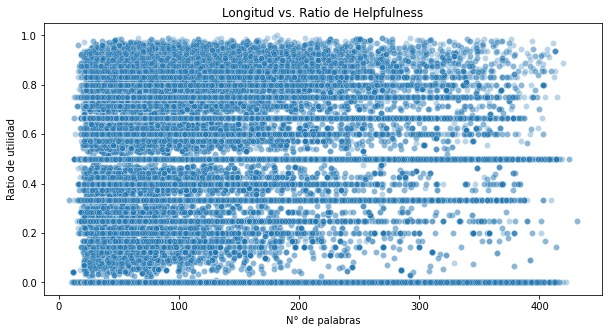

In [15]:
# Veamos una posible relación entre longitud y utilidad
plt.figure(figsize=(10,5))
sns.scatterplot(data=df_train, x='length_words', y='helpfulness_ratio', alpha=0.3)
plt.title('Longitud vs. Ratio de Helpfulness')
plt.xlabel('N° de palabras')
plt.ylabel('Ratio de utilidad')
plt.show()